In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bank = pd.read_csv("bank.csv")

In [5]:
bank.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
bank.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [8]:
""""
age – Customer’s age
job – Type of job/occupation
marital – Marital status
education – Education level
default – Has credit default (yes/no)
balance – Average yearly account balance (€)
housing – Has a housing loan (yes/no)
loan – Has a personal loan (yes/no)
contact – Contact communication type (cellular/telephone)
day – Day of the month contacted
month – Month contacted
duration – Call duration (seconds)
campaign – Number of contacts during this campaign
pdays – Days since last contact in previous campaign
previous – Number of contacts before this campaign
poutcome – Outcome of previous campaign
deposit – Customer subscribed to a deposit?
"""

'"\nage – Customer’s age\njob – Type of job/occupation\nmarital – Marital status\neducation – Education level\ndefault – Has credit default (yes/no)\nbalance – Average yearly account balance (€)\nhousing – Has a housing loan (yes/no)\nloan – Has a personal loan (yes/no)\ncontact – Contact communication type (cellular/telephone)\nday – Day of the month contacted\nmonth – Month contacted\nduration – Call duration (seconds)\ncampaign – Number of contacts during this campaign\npdays – Days since last contact in previous campaign\nprevious – Number of contacts before this campaign\npoutcome – Outcome of previous campaign\ndeposit – Customer subscribed to a deposit?\n'

In [9]:
#To build the model, we first need to convert all object-type columns into int values using encoding.

In [10]:
bank["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [11]:
bank["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
bank["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [13]:
bank["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
bank["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank["education"] =  le.fit_transform(bank["education"])
bank["month"] = le.fit_transform(bank["month"])
bank["deposit"] = le.fit_transform(bank["deposit"])

one_hot = ["job","marital","default","housing","loan","contact","poutcome"]
bank = pd.get_dummies(bank, columns=one_hot, drop_first=True)

In [16]:
bank.head()

age  education  balance  day  month  duration  campaign  pdays  previous  \
0   59          1     2343    5      8      1042         1     -1         0   
1   56          1       45    5      8      1467         1     -1         0   
2   41          1     1270    5      8      1389         1     -1         0   
3   55          1     2476    5      8       579         1     -1         0   
4   54          2      184    5      8       673         2     -1         0   

   deposit  ...  marital_married  marital_single  default_yes  housing_yes  \
0        1  ...             True           False        False         True   
1        1  ...             True           False        False        False   
2        1  ...             True           False        False         True   
3        1  ...             True           False        False         True   
4        1  ...             True           False        False        False   

   loan_yes  contact_telephone  contact_unknown  poutcome_other  \
0     False              False             True           False   
1     False              False             True           False   
2     False              False             True           False   
3     False              False             True           False   
4     False              False             True           False   

   poutcome_success  poutcome_unknown  
0             False              True  
1             False              True  
2             False              True  
3             False              True  
4             False              True  

[5 rows x 31 columns]

In [17]:
bank.columns

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'deposit', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [18]:
bank[['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'default_yes',
'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown','poutcome_other', 'poutcome_success', 'poutcome_unknown']] = bank[['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'default_yes',
'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown','poutcome_other', 'poutcome_success', 'poutcome_unknown']].astype(int)

In [19]:
bank

age  education  balance  day  month  duration  campaign  pdays  \
0       59          1     2343    5      8      1042         1     -1   
1       56          1       45    5      8      1467         1     -1   
2       41          1     1270    5      8      1389         1     -1   
3       55          1     2476    5      8       579         1     -1   
4       54          2      184    5      8       673         2     -1   
...    ...        ...      ...  ...    ...       ...       ...    ...   
11157   33          0        1   20      0       257         1     -1   
11158   39          1      733   16      6        83         4     -1   
11159   32          1       29   19      1       156         2     -1   
11160   43          1        0    8      8         9         2    172   
11161   34          1        0    9      5       628         1     -1   

       previous  deposit  ...  marital_married  marital_single  default_yes  \
0             0        1  ...                1               0            0   
1             0        1  ...                1               0            0   
2             0        1  ...                1               0            0   
3             0        1  ...                1               0            0   
4             0        1  ...                1               0            0   
...         ...      ...  ...              ...             ...          ...   
11157         0        0  ...                0               1            0   
11158         0        0  ...                1               0            0   
11159         0        0  ...                0               1            0   
11160         5        0  ...                1               0            0   
11161         0        0  ...                1               0            0   

       housing_yes  loan_yes  contact_telephone  contact_unknown  \
0                1         0                  0                1   
1                0         0                  0                1   
2                1         0                  0                1   
3                1         0                  0                1   
4                0         0                  0                1   
...            ...       ...                ...              ...   
11157            1         0                  0                0   
11158            0         0                  0                1   
11159            0         0                  0                0   
11160            0         1                  0                0   
11161            0         0                  0                0   

       poutcome_other  poutcome_success  poutcome_unknown  
0                   0                 0                 1  
1                   0                 0                 1  
2                   0                 0                 1  
3                   0                 0                 1  
4                   0                 0                 1  
...               ...               ...               ...  
11157               0                 0                 1  
11158               0                 0                 1  
11159               0                 0                 1  
11160               0                 0                 0  
11161               0                 0                 1  

[11162 rows x 31 columns]

<Axes: >

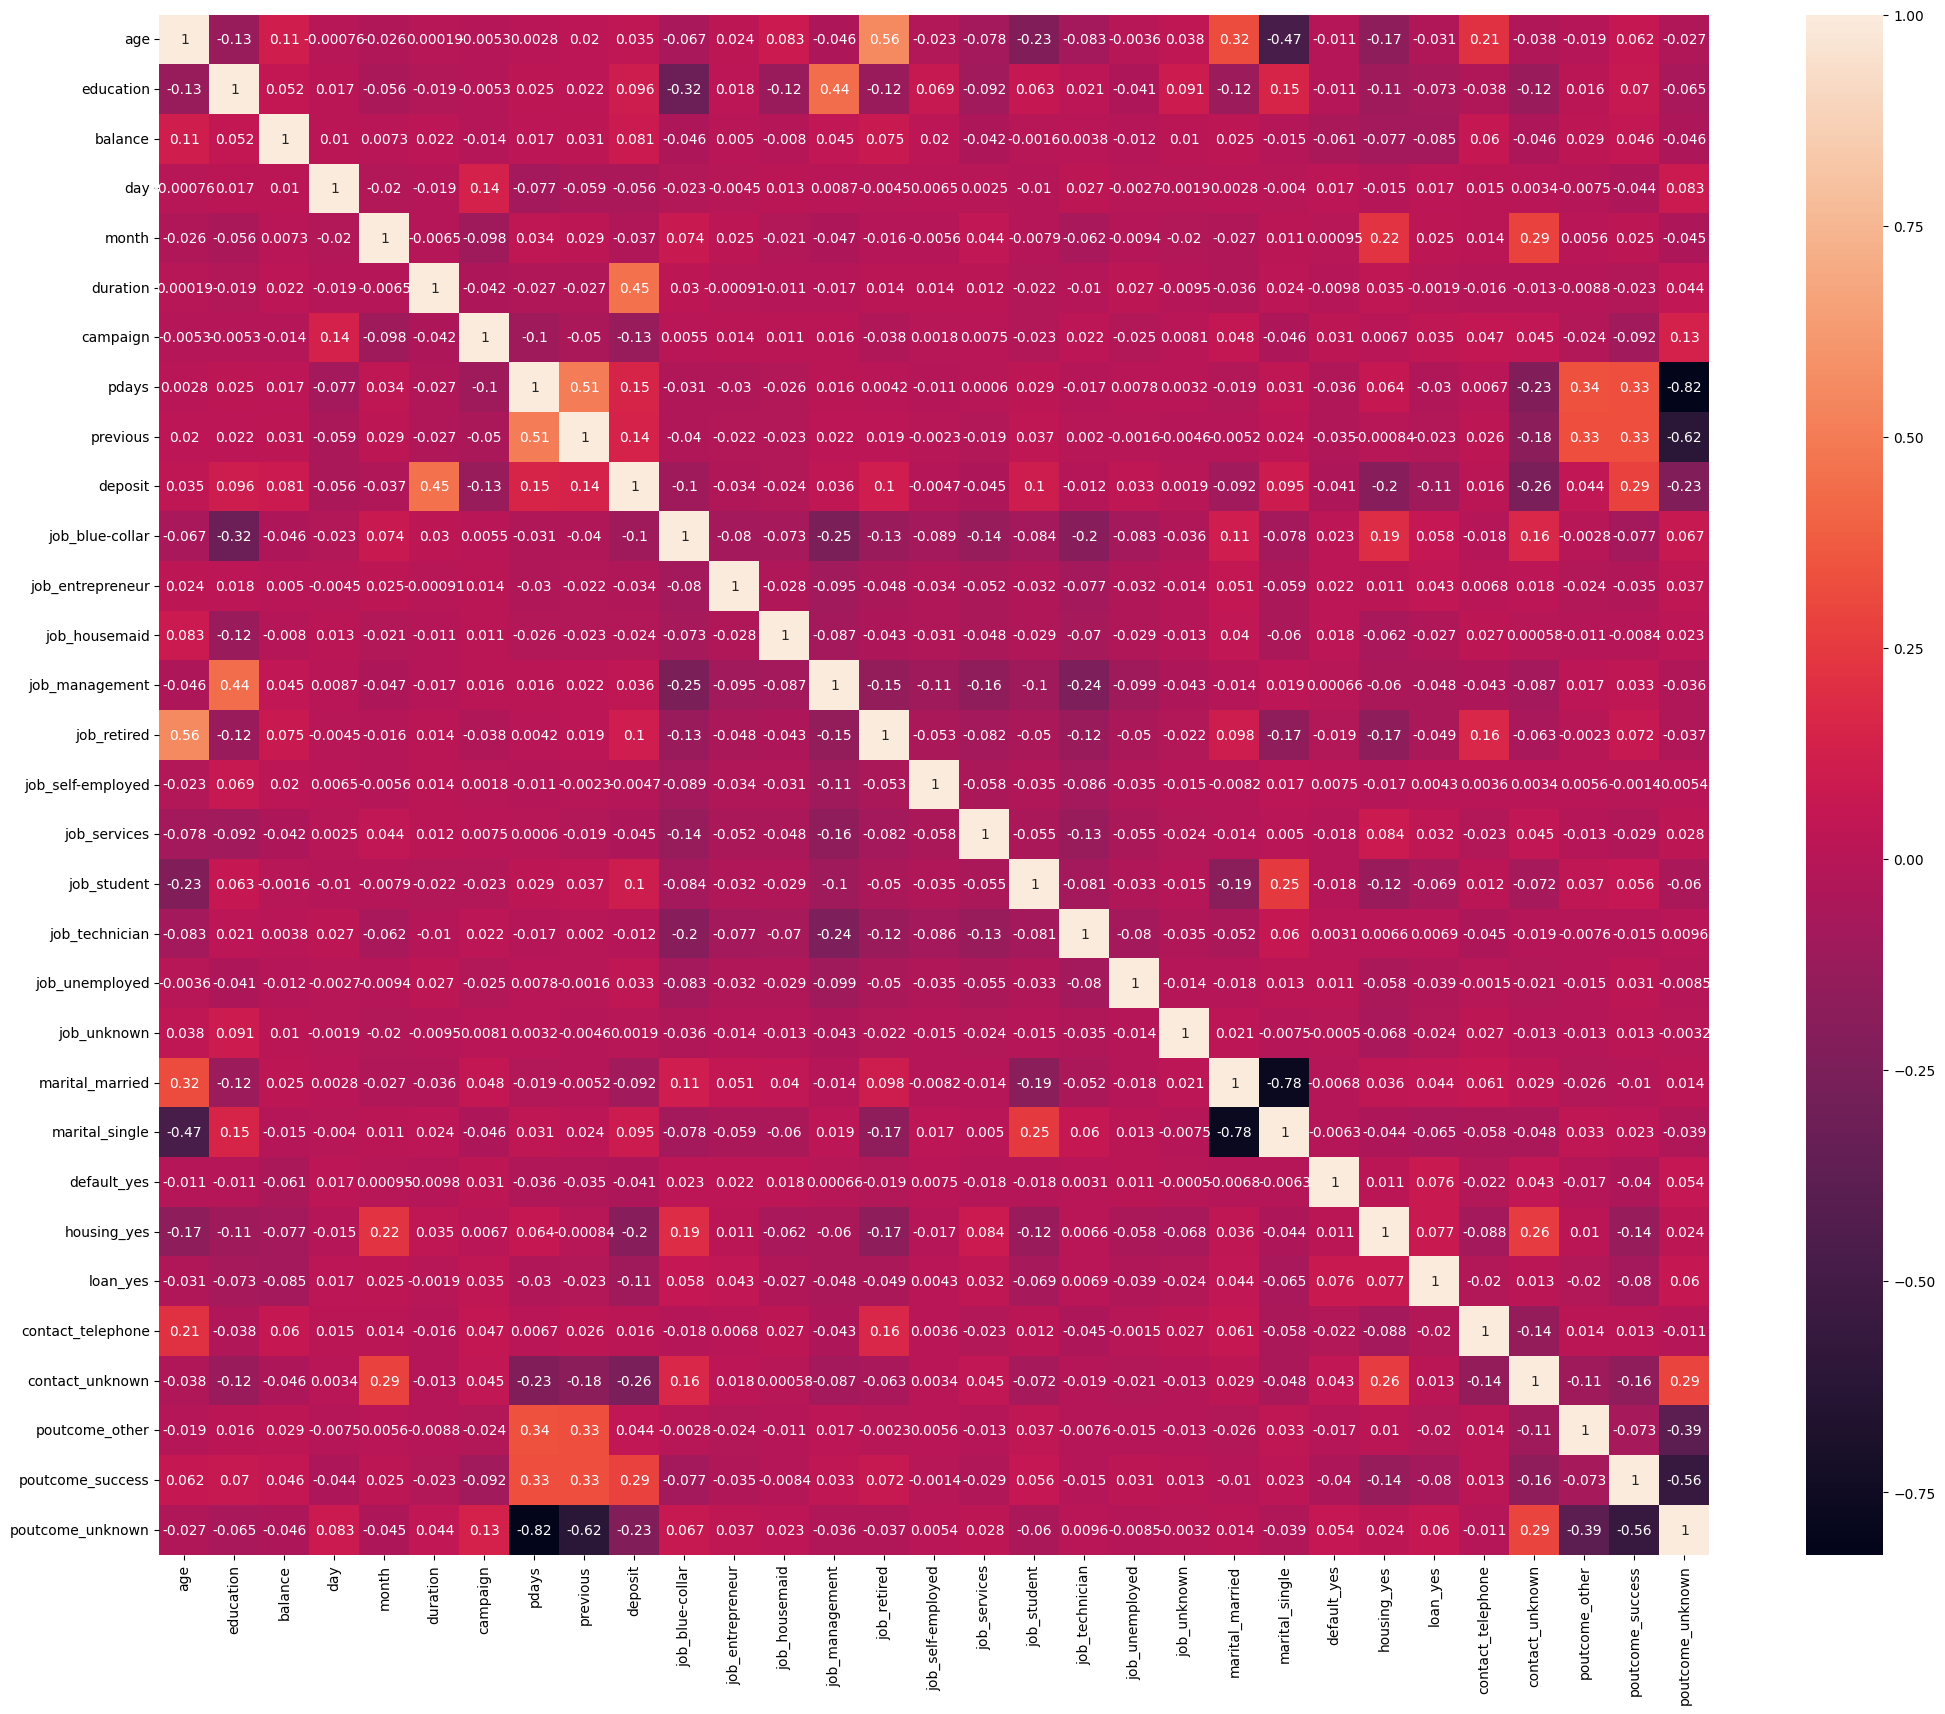

In [20]:
bank.corr()
plt.figure(figsize=(25,20))
sns.heatmap(bank.corr(), annot=True)

In [21]:
X = pd.get_dummies(bank.drop("deposit", axis=1))
y = bank["deposit"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8929, 30)
(8929,)
(2233, 30)
(2233,)


In [24]:
X_train

age  education  balance  day  month  duration  campaign  pdays  \
3955    28          2     5741   10     11      1042         5    200   
11150   34          1      355   21      1       314         3     -1   
5173    48          1      201   10      9       594         1     91   
3017    53          2     1961   15      2       351         1     -1   
2910    53          2     1624   11      9       166         3     97   
...    ...        ...      ...  ...    ...       ...       ...    ...   
5734    47          2      761   11      5        80         2     -1   
5191    28          2      159   16      9       449         2     33   
5390    35          1     1144   20      1       197        13     -1   
860     51          2      746   25      1       372         5     -1   
7270    30          2        2   23      7       269         1     -1   

       previous  job_blue-collar  ...  marital_married  marital_single  \
3955          3                0  ...                0               1   
11150         0                0  ...                1               0   
5173          1                0  ...                0               0   
3017          0                0  ...                1               0   
2910          7                0  ...                1               0   
...         ...              ...  ...              ...             ...   
5734          0                0  ...                1               0   
5191          4                0  ...                0               1   
5390          0                0  ...                1               0   
860           0                0  ...                1               0   
7270          0                0  ...                0               1   

       default_yes  housing_yes  loan_yes  contact_telephone  contact_unknown  \
3955             0            0         0                  0                0   
11150            0            0         0                  0                0   
5173             0            0         0                  0                0   
3017             0            0         0                  0                0   
2910             0            0         0                  0                0   
...            ...          ...       ...                ...              ...   
5734             0            1         0                  0                0   
5191             0            0         0                  0                0   
5390             0            0         0                  0                0   
860              0            0         0                  0                0   
7270             0            0         0                  0                0   

       poutcome_other  poutcome_success  poutcome_unknown  
3955                0                 0                 0  
11150               0                 0                 1  
5173                0                 1                 0  
3017                0                 0                 1  
2910                0                 1                 0  
...               ...               ...               ...  
5734                0                 0                 1  
5191                0                 1                 0  
5390                0                 0                 1  
860                 0                 0                 1  
7270                0                 0                 1  

[8929 rows x 30 columns]

In [25]:
y.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
log_model = LogisticRegression(max_iter=5000)
knn_model = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)

In [29]:
log_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

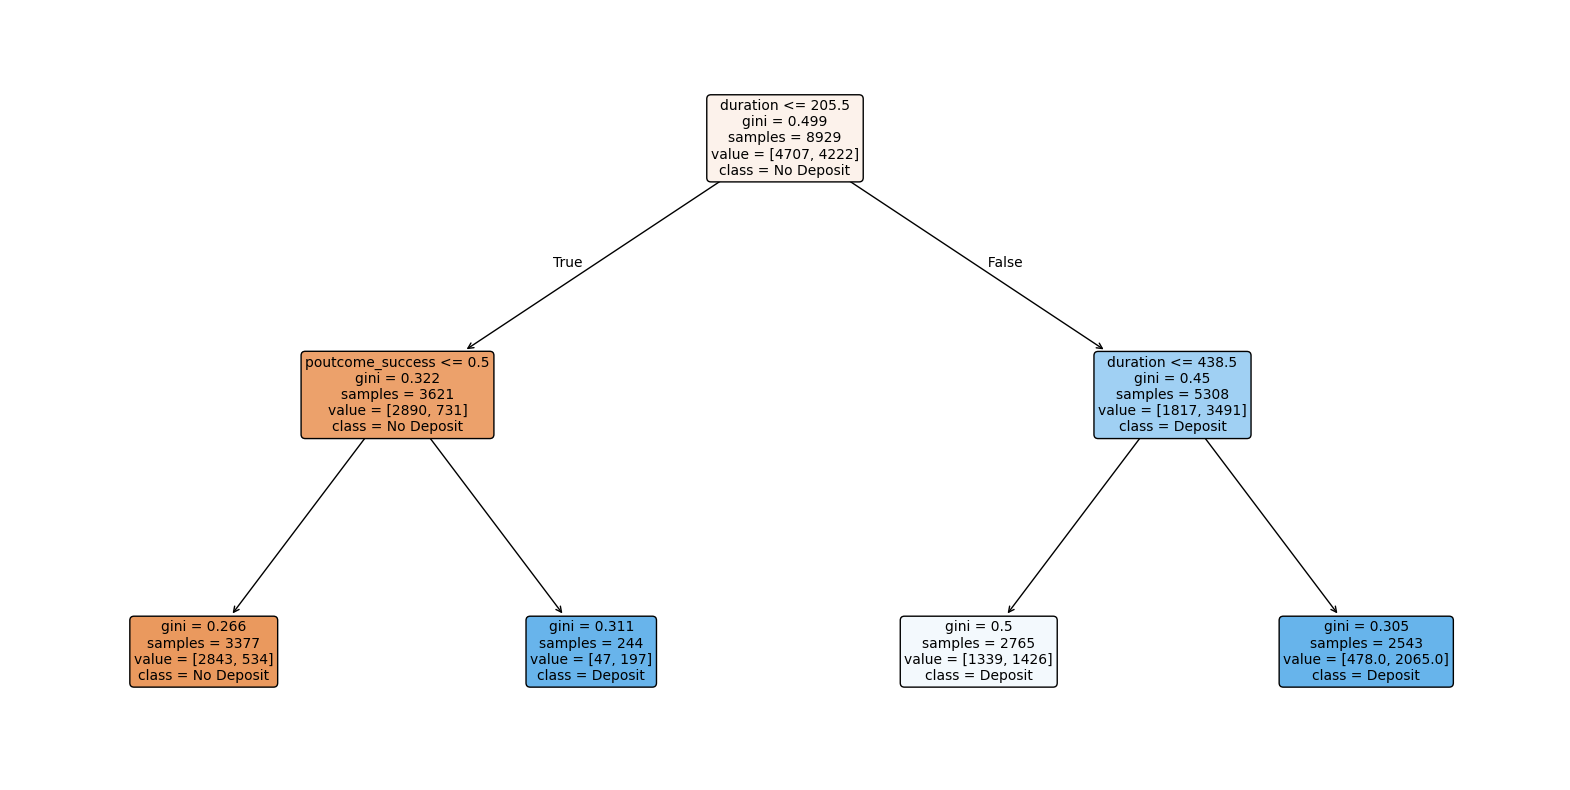

In [30]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=2,random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["No Deposit", "Deposit"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [31]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_log_test = log_model.predict(X_test_scaled)
y_pred_log_train = log_model.predict(X_train_scaled)

print("LOGISTIC: TEST")
print(classification_report(y_test, y_pred_log_test))
print("Accuracy:", accuracy_score(y_test, y_pred_log_test))
print("------------------------------------------------------------")

print("LOGISTIC: TRAIN")
print(classification_report(y_train, y_pred_log_train))
print("Accuracy:", accuracy_score(y_train, y_pred_log_train))
print("============================================================")

y_pred_knn_test = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

print("KNN: TEST")
print(classification_report(y_test, y_pred_knn_test))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_test))
print("------------------------------------------------------------")

print("KNN: TRAIN")
print(classification_report(y_train, y_pred_knn_train))
print("Accuracy:", accuracy_score(y_train, y_pred_knn_train))
print("============================================================")

y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print("DECISION TREE: TEST")
print(classification_report(y_test, y_pred_dt_test))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("------------------------------------------------------------")

print("DECISION TREE: TRAIN")
print(classification_report(y_train, y_pred_dt_train))
print("Accuracy:", accuracy_score(y_train, y_pred_dt_train))

LOGISTIC: TEST
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1166
           1       0.81      0.76      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

Accuracy: 0.7980295566502463
------------------------------------------------------------
LOGISTIC: TRAIN
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4707
           1       0.82      0.76      0.79      4222

    accuracy                           0.81      8929
   macro avg       0.81      0.81      0.81      8929
weighted avg       0.81      0.81      0.81      8929

Accuracy: 0.8075932355246949
KNN: TEST
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1166
           1       0.77      0.70      0.74      1067

    accuracy          

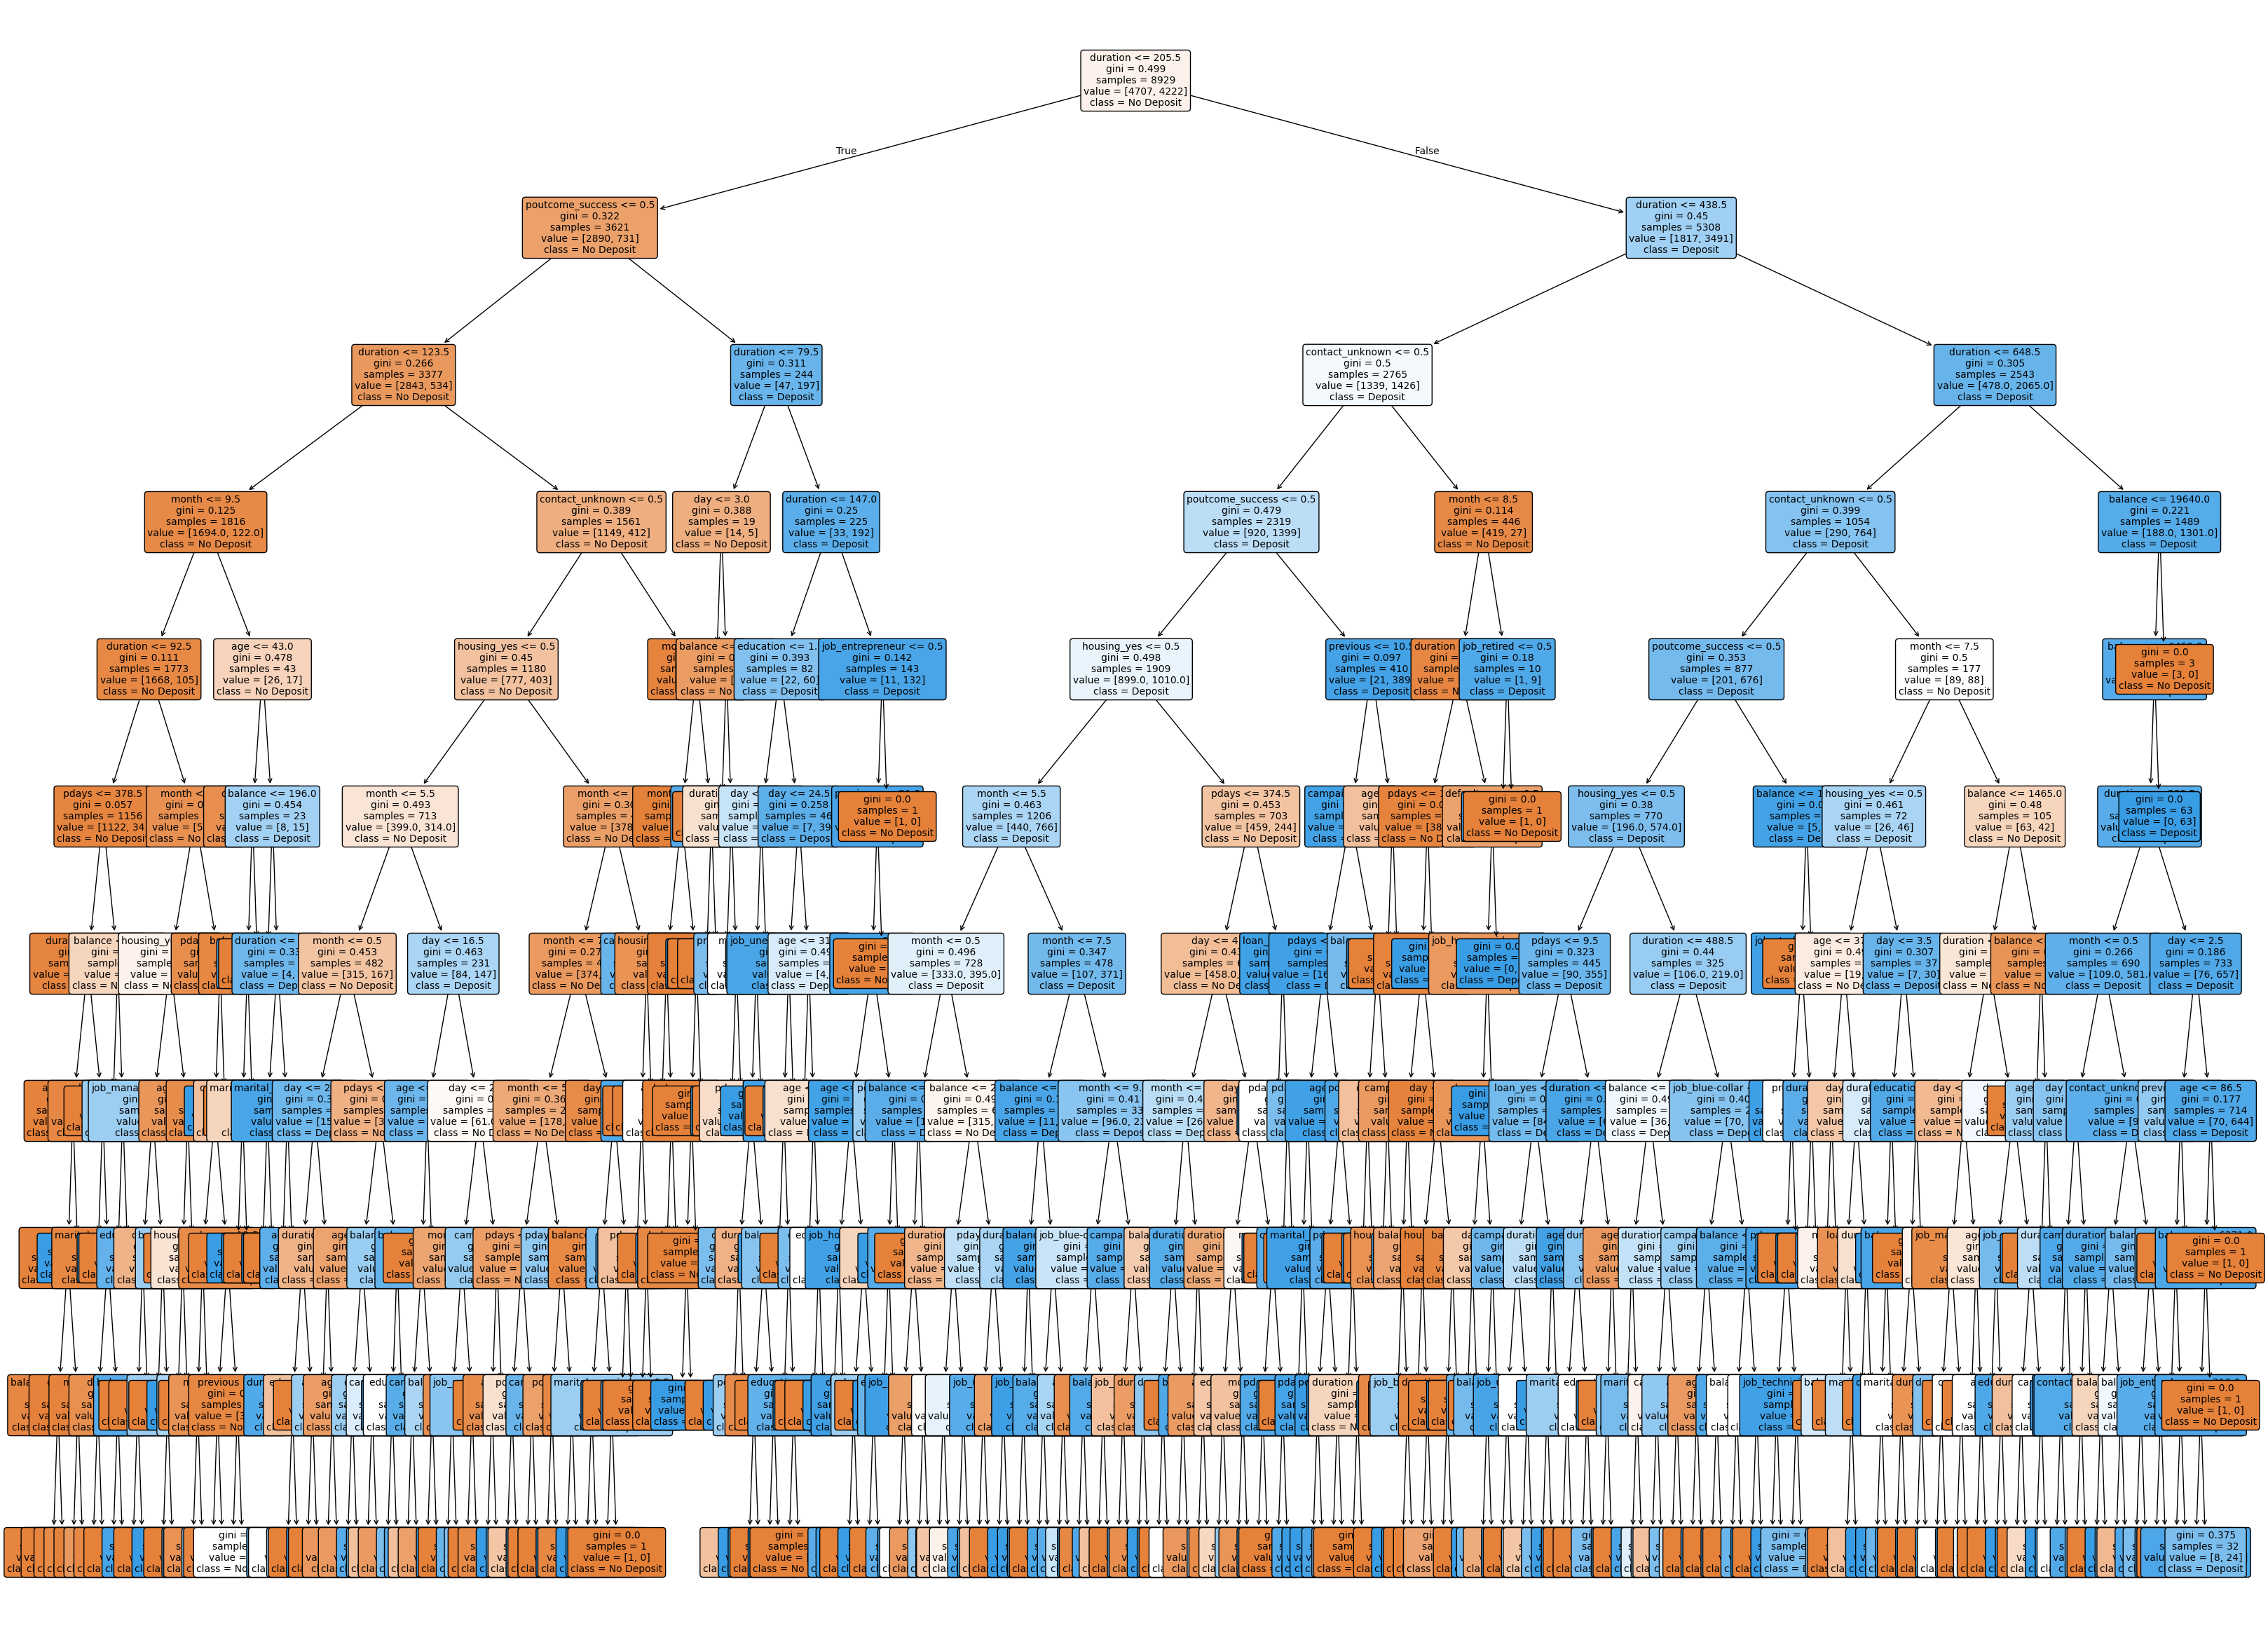

In [32]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(40, 30))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["No Deposit", "Deposit"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [33]:
y_pred_log_test = log_model.predict(X_test_scaled)
y_pred_log_train = log_model.predict(X_train_scaled)

print("LOGISTIC: TEST")
print(classification_report(y_test, y_pred_log_test))
print("Accuracy:", accuracy_score(y_test, y_pred_log_test))
print("------------------------------------------------------------")

print("LOGISTIC: TRAIN")
print(classification_report(y_train, y_pred_log_train))
print("Accuracy:", accuracy_score(y_train, y_pred_log_train))
print("============================================================")

y_pred_knn_test = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

print("KNN: TEST")
print(classification_report(y_test, y_pred_knn_test))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_test))
print("------------------------------------------------------------")

print("KNN: TRAIN")
print(classification_report(y_train, y_pred_knn_train))
print("Accuracy:", accuracy_score(y_train, y_pred_knn_train))
print("============================================================")

y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print("DECISION TREE: TEST")
print(classification_report(y_test, y_pred_dt_test))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("------------------------------------------------------------")

print("DECISION TREE: TRAIN")
print(classification_report(y_train, y_pred_dt_train))
print("Accuracy:", accuracy_score(y_train, y_pred_dt_train))

LOGISTIC: TEST
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1166
           1       0.81      0.76      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

Accuracy: 0.7980295566502463
------------------------------------------------------------
LOGISTIC: TRAIN
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4707
           1       0.82      0.76      0.79      4222

    accuracy                           0.81      8929
   macro avg       0.81      0.81      0.81      8929
weighted avg       0.81      0.81      0.81      8929

Accuracy: 0.8075932355246949
KNN: TEST
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1166
           1       0.77      0.70      0.74      1067

    accuracy          

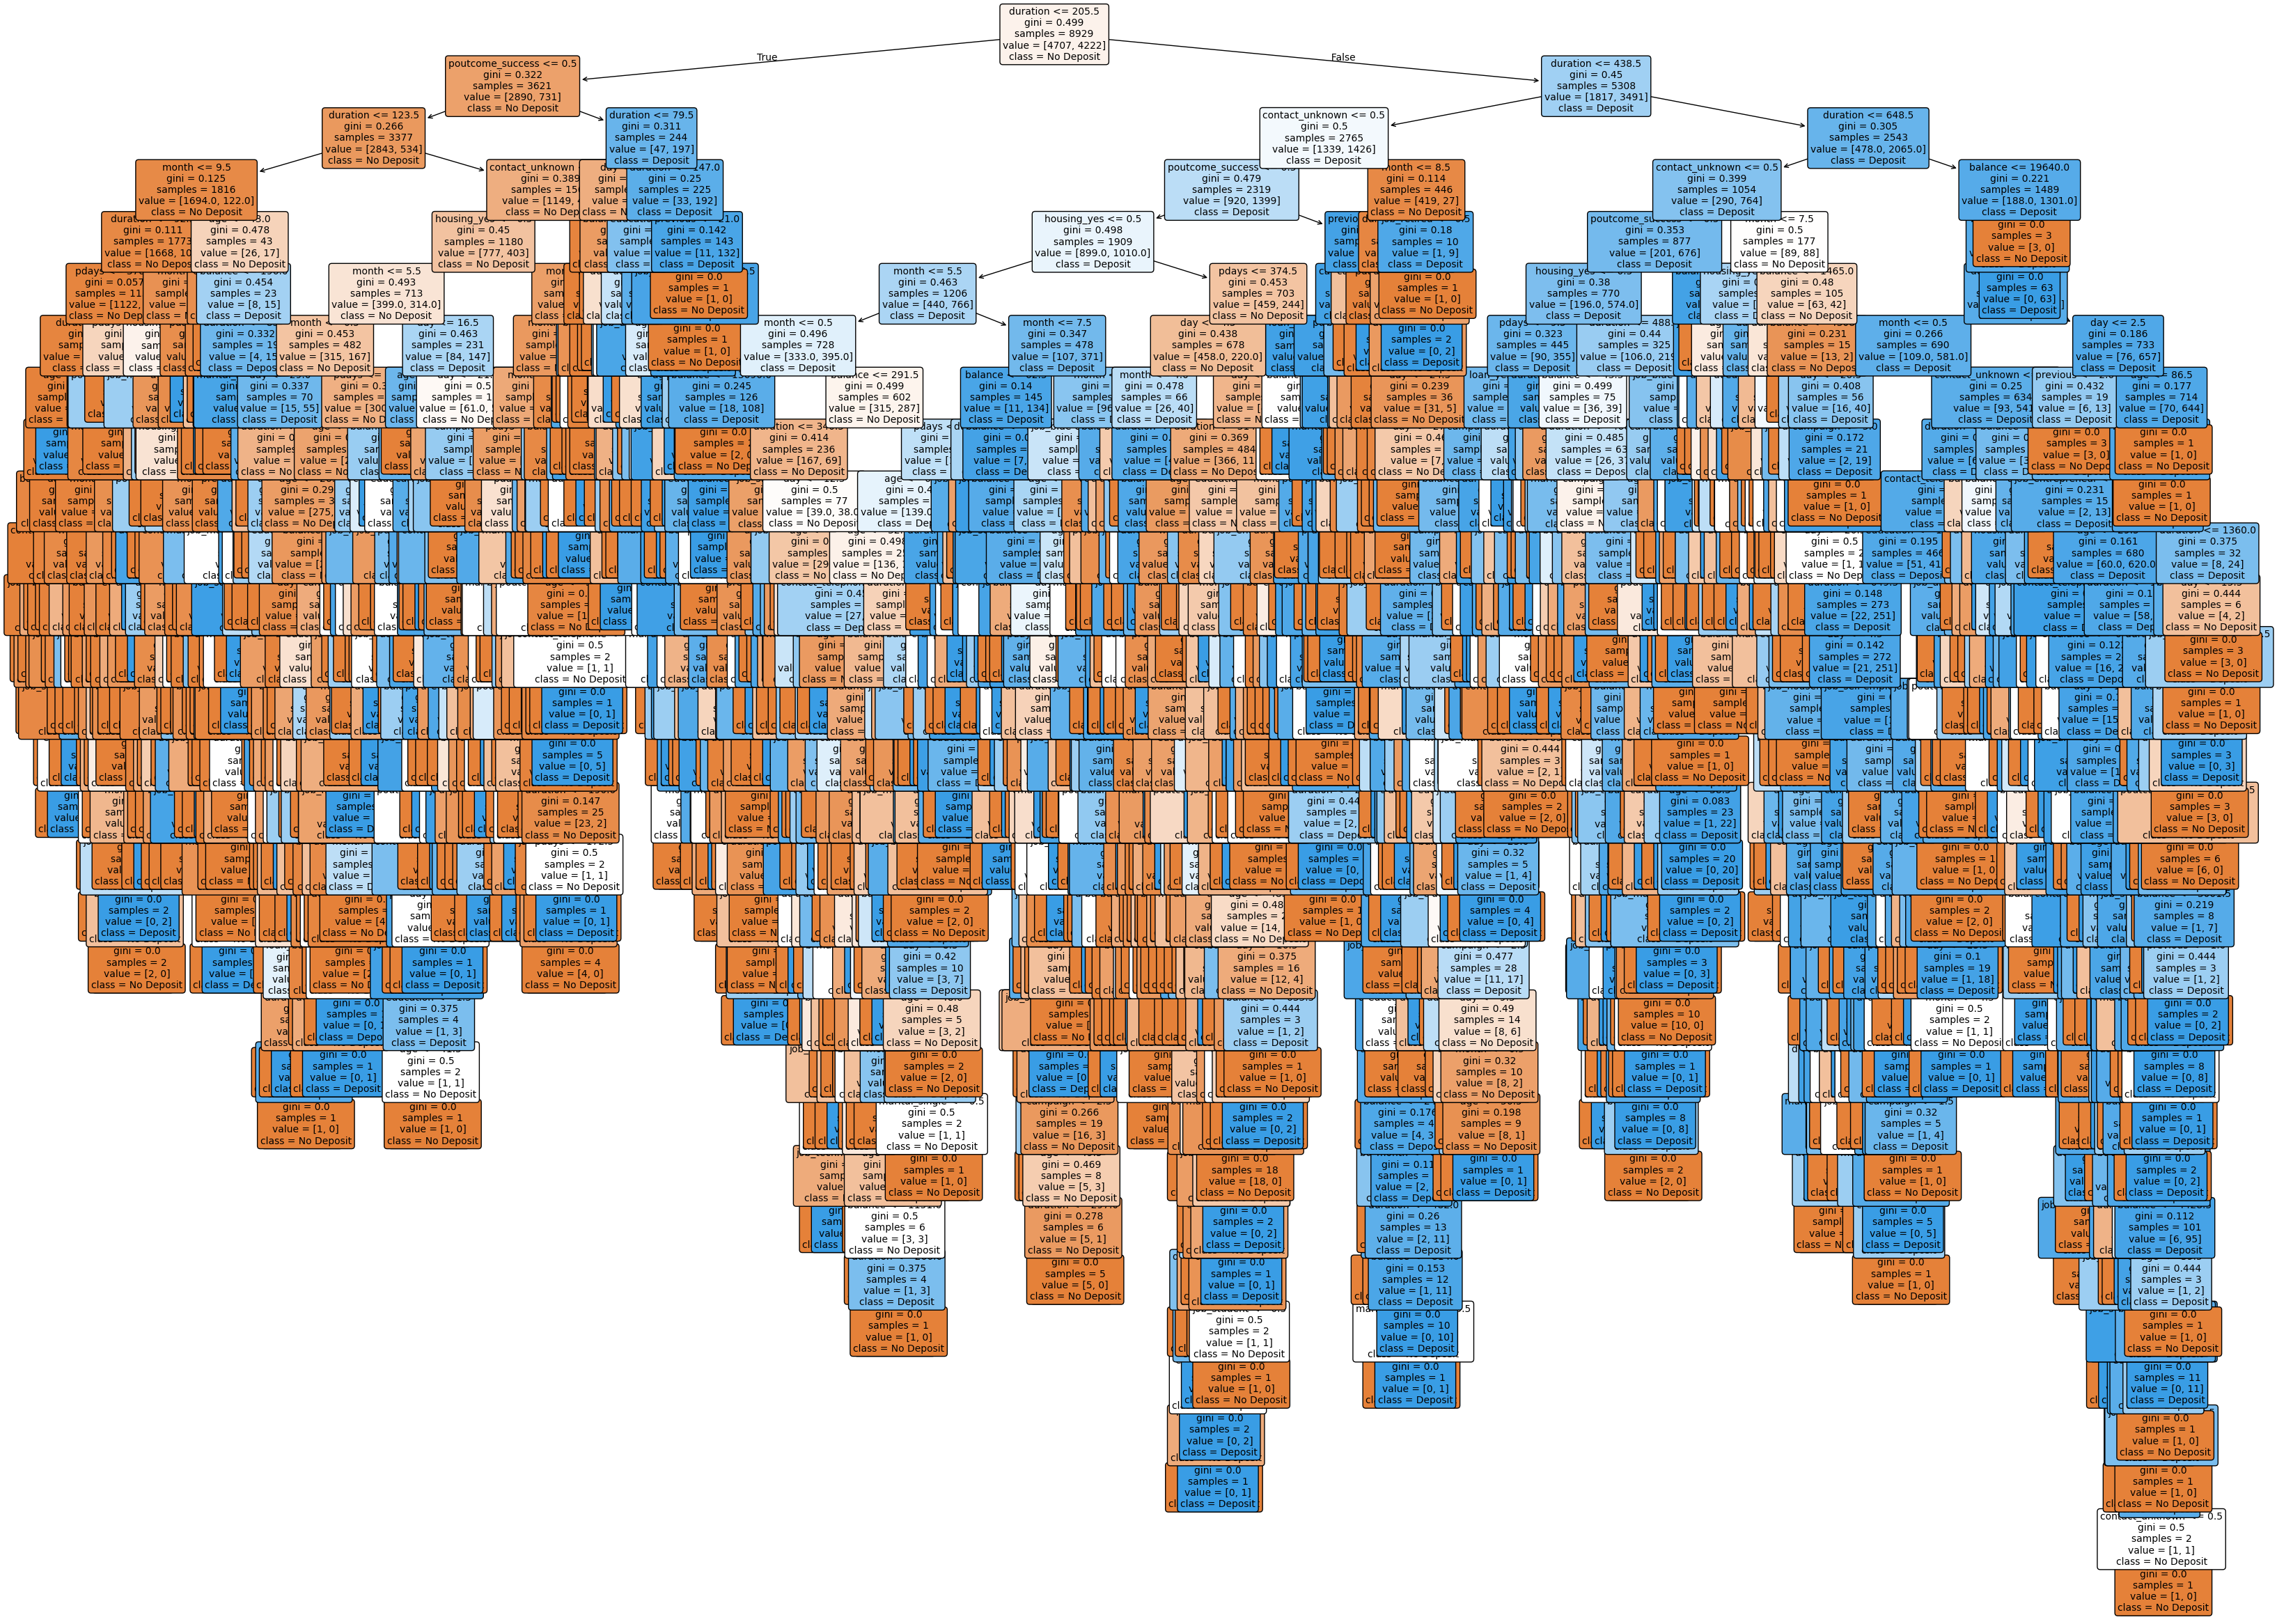

In [34]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=None,random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(40, 30))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["No Deposit", "Deposit"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [35]:
y_pred_log_test = log_model.predict(X_test_scaled)
y_pred_log_train = log_model.predict(X_train_scaled)

print("LOGISTIC: TEST")
print(classification_report(y_test, y_pred_log_test))
print("Accuracy:", accuracy_score(y_test, y_pred_log_test))
print("------------------------------------------------------------")

print("LOGISTIC: TRAIN")
print(classification_report(y_train, y_pred_log_train))
print("Accuracy:", accuracy_score(y_train, y_pred_log_train))
print("============================================================")

y_pred_knn_test = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

print("KNN: TEST")
print(classification_report(y_test, y_pred_knn_test))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_test))
print("------------------------------------------------------------")

print("KNN: TRAIN")
print(classification_report(y_train, y_pred_knn_train))
print("Accuracy:", accuracy_score(y_train, y_pred_knn_train))
print("============================================================")

y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print("DECISION TREE: TEST")
print(classification_report(y_test, y_pred_dt_test))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("------------------------------------------------------------")

print("DECISION TREE: TRAIN")
print(classification_report(y_train, y_pred_dt_train))
print("Accuracy:", accuracy_score(y_train, y_pred_dt_train))

LOGISTIC: TEST
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1166
           1       0.81      0.76      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

Accuracy: 0.7980295566502463
------------------------------------------------------------
LOGISTIC: TRAIN
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4707
           1       0.82      0.76      0.79      4222

    accuracy                           0.81      8929
   macro avg       0.81      0.81      0.81      8929
weighted avg       0.81      0.81      0.81      8929

Accuracy: 0.8075932355246949
KNN: TEST
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1166
           1       0.77      0.70      0.74      1067

    accuracy          

In [ ]:
"""
When max_depth = 2, both train and test accuracy are low, and the tree is very simple.
This means the model does not learn the data well, which leads to underfitting.
When max_depth = 10, the results are good and close to each other. This indicates that the model is more balanced.
Finally, when max_depth = None, the model learns too much and becomes sensitive to small variations. As a result, overfitting occurs.
"""

In [36]:
mini = bank[["age", "balance", "deposit"]].sample(6, random_state=42)
mini

age  balance  deposit
5527   65      744        0
4541   38     1627        1
1964   35     4963        1
5007   47     8229        1
8928   35     1473        0
8936   30      119        0

In [40]:
X = mini.drop('deposit', axis=1)
y = mini['deposit']

In [55]:
correct = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=42)
correct.fit(X[["balance"]], y)

DecisionTreeClassifier(max_depth=1, random_state=42)

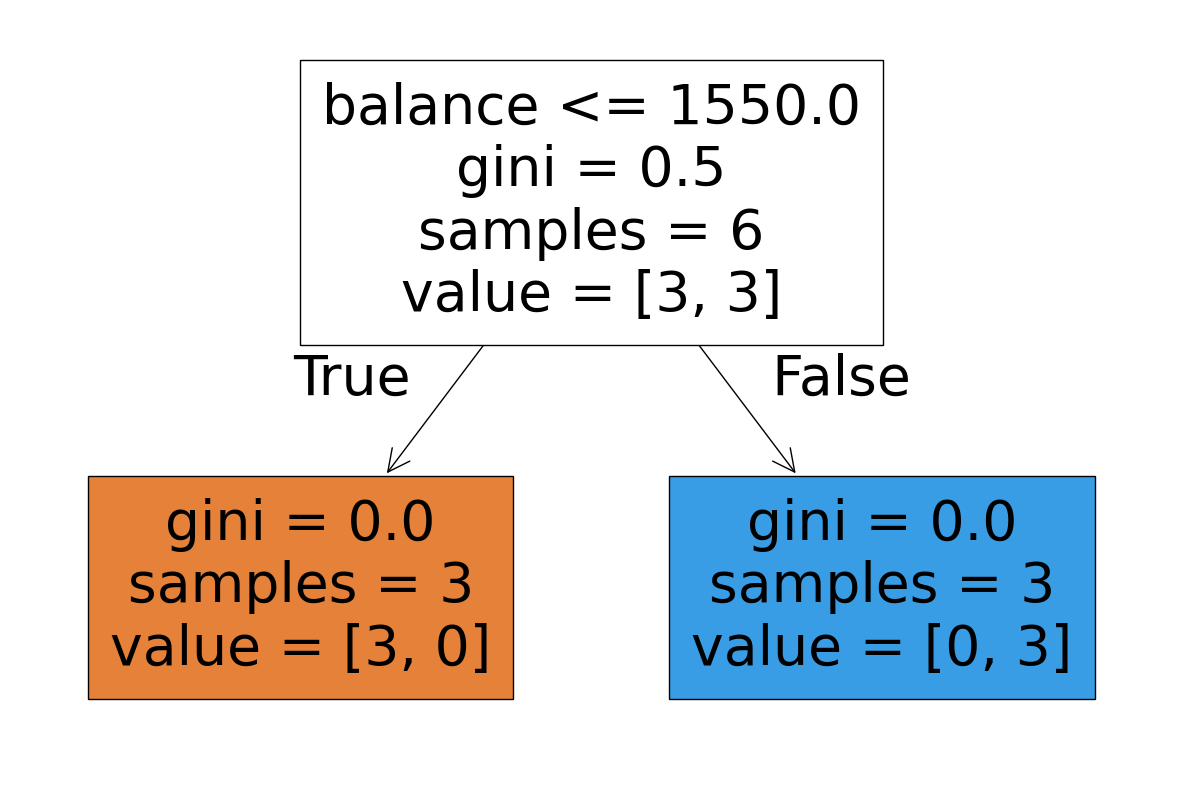

In [56]:
plt.figure(figsize=(15,10))
plot_tree(correct, feature_names=["balance"], filled=True)
plt.show()

In [58]:
wrong = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=42)
wrong.fit(X[["age"]], y)

DecisionTreeClassifier(max_depth=1, random_state=42)

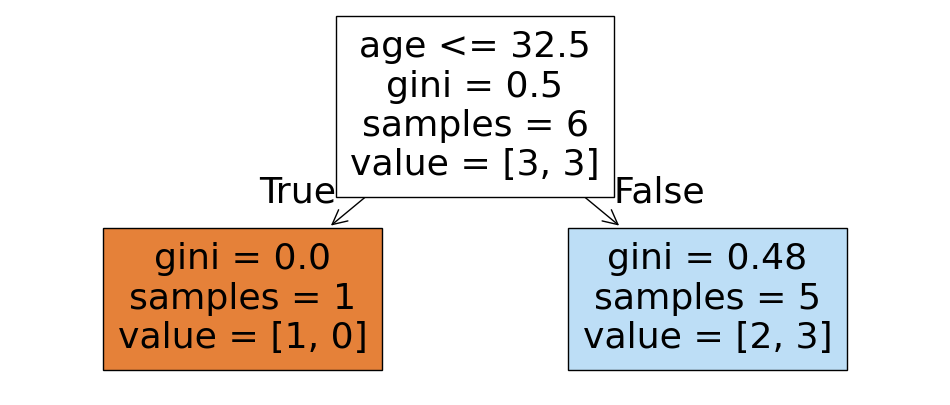

In [59]:
plt.figure(figsize=(12,5))
plot_tree(wrong, feature_names=["age"], filled=True)
plt.show()

In [ ]:
""""
When choosing the Balance column as the split, the Gini in both nodes is equal to zero.
In contrast, with the Age column, the right node is mixed, which increases the risk of incorrect predictions by the model.
"""

In [60]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="Value")

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt1 = DecisionTreeRegressor(max_depth=1, random_state=42)
dt1.fit(X_train, y_train)

y_train_pred1 = dt1.predict(X_train)
y_test_pred1 = dt1.predict(X_test)

train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

print("Train MSE:", train_mse1, "Test MSE:", test_mse1)

Train MSE: 0.9130240280918052 Test MSE: 0.9441349708215669


In [63]:
dt3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dt3.fit(X_train, y_train)

y_train_pred1 = dt3.predict(X_train)
y_test_pred1 = dt3.predict(X_test)

train_mse3 = mean_squared_error(y_train, y_train_pred1)
test_mse3 = mean_squared_error(y_test, y_test_pred1)

print("Train MSE:", train_mse3, "Test MSE:", test_mse3)

Train MSE: 0.61772790023286 Test MSE: 0.6424109810265641


In [64]:
dtno = DecisionTreeRegressor(max_depth=1, random_state=42)
dtno.fit(X_train, y_train)

y_train_predno = dtno.predict(X_train)
y_test_predno = dtno.predict(X_test)

train_mseno = mean_squared_error(y_train, y_train_pred1)
test_mseno = mean_squared_error(y_test, y_test_pred1)

print("Train MSE:", train_mseno, "Test MSE:", test_mseno)

Train MSE: 0.61772790023286 Test MSE: 0.6424109810265641


In [ ]:
""""
When max_depth = 1, the tree is simple, and the MSE is high. This leads to underfitting.
When max_depth = 3, the MSE is appropriate and low, so the model is balanced.
When max_depth = None, the train MSE is very low but the test MSE is high, and the tree is very large, indicating overfitting.
"""

In [67]:
X = bank.drop("deposit", axis=1)
y = bank["deposit"]

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=5000, random_state=42))])
f1_scores_scaled = cross_val_score(pipeline, X, y, cv=5, scoring="f1")
print("F1 score with scaling:", np.mean(f1_scores_scaled))

F1 score with scaling: 0.7499537133494512


In [73]:
logreg = LogisticRegression(max_iter=5000, random_state=42)
f1_scores_noscale = cross_val_score(logreg, X, y, cv=5, scoring="f1")
print("F1 score without scaling:", np.mean(f1_scores_noscale))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1 score without scaling: 0.7496453314402911


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
""""
Without scaling, Logistic Regression failed to converge (warning) and F1 stability is low;
with scaling, the model converges normally and F1 score is stable.
"""

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
pipeline.fit(X_train, y_train)
accuracy_split = pipeline.score(X_test, y_test)
print("Train-test split accuracy:", accuracy_split)

Train-test split accuracy: 0.7980295566502463


In [79]:
accuracy_cv = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
print("Cross-validation accuracies:", accuracy_cv)
print("Average CV accuracy:", np.mean(accuracy_cv))

Cross-validation accuracies: [0.75369458 0.7492163  0.77464158 0.81362007 0.79883513]
Average CV accuracy: 0.7780015312829551


In [ ]:
""""
Train-test split accuracy can vary depending on the random test set and may sometimes be misleading.
Cross-validation uses all parts of the dataset as both train and test, making the results more stable and reliable.
"""

In [80]:
pipeline1 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))])
f1_knn1 = np.mean(cross_val_score(pipeline1, X, y, cv=5, scoring="f1"))
print("KNN k=1 F1:", f1_knn1)

pipeline3 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))])
f1_knn3 = np.mean(cross_val_score(pipeline3, X, y, cv=5, scoring="f1"))
print("KNN k=3 F1:", f1_knn3)

pipeline5 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
f1_knn5 = np.mean(cross_val_score(pipeline5, X, y, cv=5, scoring="f1"))
print("KNN k=5 F1:", f1_knn5)

pipeline7 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))])
f1_knn7 = np.mean(cross_val_score(pipeline7, X, y, cv=5, scoring="f1"))
print("KNN k=7 F1:", f1_knn7)

pipeline9 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))])
f1_knn9 = np.mean(cross_val_score(pipeline9, X, y, cv=5, scoring="f1"))
print("KNN k=9 F1:", f1_knn9)

pipeline11 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])
f1_knn11 = np.mean(cross_val_score(pipeline11, X, y, cv=5, scoring="f1"))
print("KNN k=11 F1:", f1_knn11)

KNN k=1 F1: 0.6594333086469074
KNN k=3 F1: 0.6764340389668081
KNN k=5 F1: 0.6804509992879287
KNN k=7 F1: 0.6808524518732623
KNN k=9 F1: 0.6779867320302103
KNN k=11 F1: 0.6821247945983983


In [82]:
dt2 = DecisionTreeClassifier(max_depth=2, random_state=42)
f1_dt2 = np.mean(cross_val_score(dt2, X, y, cv=5, scoring="f1"))
print("Decision Tree max_depth=2 F1:", f1_dt2)

dt4 = DecisionTreeClassifier(max_depth=4, random_state=42)
f1_dt4 = np.mean(cross_val_score(dt4, X, y, cv=5, scoring="f1"))
print("Decision Tree max_depth=4 F1:", f1_dt4)

dt6 = DecisionTreeClassifier(max_depth=6, random_state=42)
f1_dt6 = np.mean(cross_val_score(dt6, X, y, cv=5, scoring="f1"))
print("Decision Tree max_depth=6 F1:", f1_dt6)

dt8 = DecisionTreeClassifier(max_depth=8, random_state=42)
f1_dt8 = np.mean(cross_val_score(dt8, X, y, cv=5, scoring="f1"))
print("Decision Tree max_depth=8 F1:", f1_dt8)

dtNo = DecisionTreeClassifier(max_depth=None, random_state=42)
f1_dtNo = np.mean(cross_val_score(dtNo, X, y, cv=5, scoring="f1"))
print("Decision Tree max_depth=None F1:", f1_dtNo)

Decision Tree max_depth=2 F1: 0.6829696012960662
Decision Tree max_depth=4 F1: 0.7251900578313961
Decision Tree max_depth=6 F1: 0.7660999281298901
Decision Tree max_depth=8 F1: 0.7664958509148064
Decision Tree max_depth=None F1: 0.7213634613186204


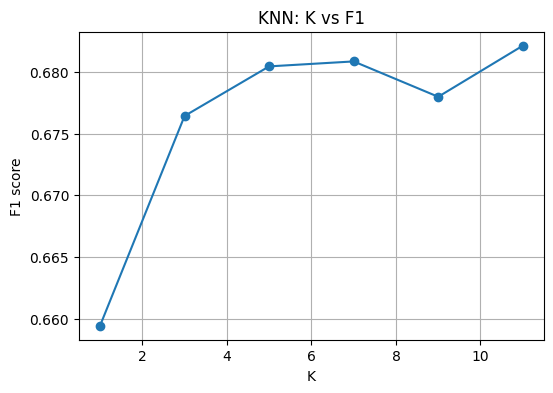

In [83]:
k_values = [1, 3, 5, 7, 9, 11]
f1_knn_values = [f1_knn1, f1_knn3, f1_knn5, f1_knn7, f1_knn9, f1_knn11]

plt.figure(figsize=(6,4))
plt.plot(k_values, f1_knn_values, marker='o')
plt.title("KNN: K vs F1")
plt.xlabel("K")
plt.ylabel("F1 score")
plt.grid(True)
plt.show()

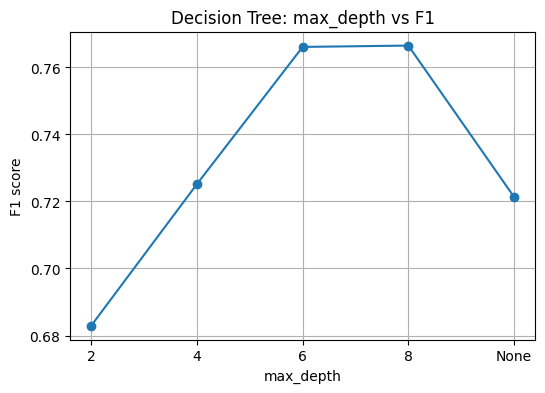

In [85]:
depth_values = [2, 4, 6, 8, 'None']
f1_dt_values = [f1_dt2, f1_dt4, f1_dt6, f1_dt8, f1_dtNo]

plt.figure(figsize=(6,4))
plt.plot(depth_values, f1_dt_values, marker='o')
plt.title("Decision Tree: max_depth vs F1")
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.grid(True)
plt.show()

In [ ]:
"""
KNN:
k=1 → overfitting: the model performs very well on train data, but makes many errors on test data.
k=3–7 → balanced, both train and test F1 scores are reasonable.
k=9–11 → slight underfitting, the model becomes simpler, bias increases.
Decision Tree:
max_depth=2 → underfitting, both train and test F1 are low, the tree is too simple.
max_depth=4–6 → balanced, good performance, train and test F1 scores are close.
max_depth=8–None → overfitting, train F1 is very high, test F1 slightly lower, the tree is very deep and sensitive to small samples.
"""